<a href="https://colab.research.google.com/github/yufang934/ML_practice/blob/main/ClassificationTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

In [10]:
"""
1.DataFrame：多行多列
2.Series：一行多列or一列多行
"""
import pandas as pd
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
df["target"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


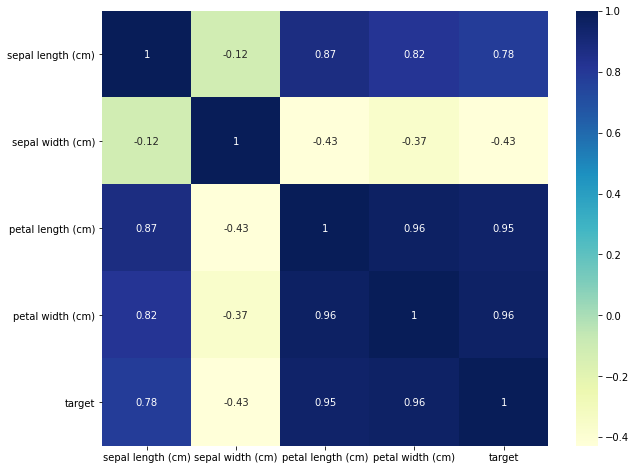

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
#設定圖的大小
plt.figure(figsize=(10,8))
sns.heatmap(df.astype("float").corr(), cmap="YlGnBu",annot=True)

In [13]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [20]:
from sklearn.model_selection import train_test_split
#train_test_split -> (特徵90%,特徵10%,目標90%,目標10%)
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"],axis=1), df["target"], test_size=0.1) #drop axis=1 丟掉直行

In [22]:
#訓練
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

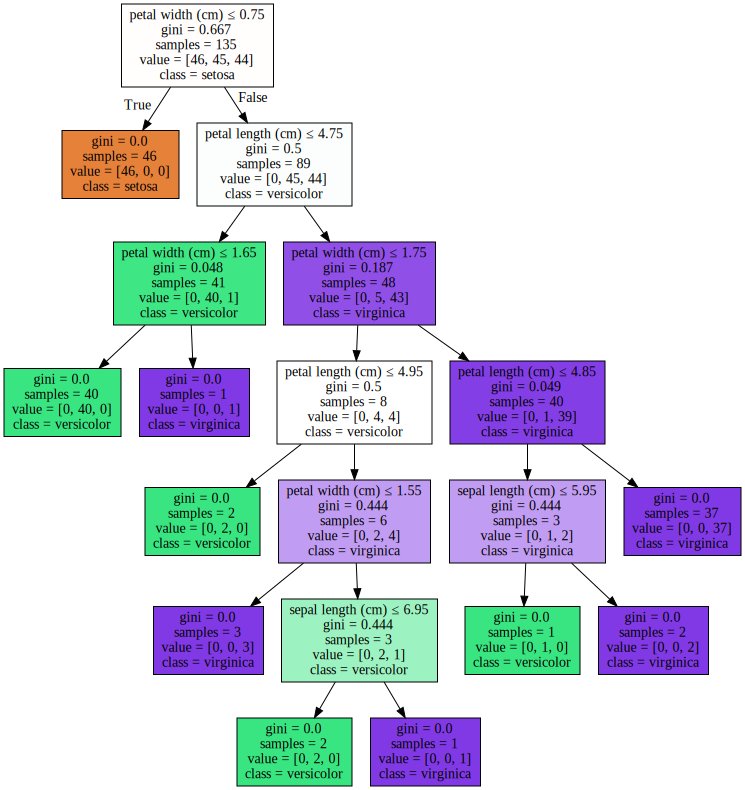

In [26]:
#圖
from sklearn.tree import export_graphviz
import graphviz
q = export_graphviz(clf, out_file=None, feature_names=iris["feature_names"],
            class_names=iris["target_names"],filled=True, special_characters=True)
graph = graphviz.Source(q)
graph

In [28]:
pre = clf.predict(x_test)
print("預測結果：", list(pre))
print("真正標籤：", list(y_test))

預測結果： [1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2]
真正標籤： [1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2]
